### <font color=black>This following analysis will explore the a survey asking Americans which is their favorie starwars film</font>
####  <font color=blue>02 Data Overview</font>

In [7]:
# Read the data set into a dataframe.
# Explore the data by entering star_wars.head(10). Look for any strange values in the columns and rows.
# Review the column names with star_wars.columns.
# Remove any rows where RespondentID is NaN. You can use the pandas.notnull() function to accomplish this. Only select rows where the RespondentID column is not null.
# When you're finished, star_wars should only consist of rows where RespondentID is not NaN.

import pandas as pd

star_wars = pd.read_csv('StarWars.csv', encoding='iso-8859-1')
print(star_wars.head(10))
# for col in star_wars.columns:
#     print(col)
print(star_wars.columns)
    
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]


   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

####  <font color=blue>03 Cleaning and Mapping Yes/No Columns</font>

In [8]:
# Convert the Have you seen any of the 6 films in the Star Wars franchise? column to the Boolean type.
# Convert the Do you consider yourself to be a fan of the Star Wars film franchise? column to the Boolean type.
# When you're finished, both columns should only contain the values True, False, and NaN.

yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

####  <font color=blue>04 Cleaning and Mapping Checkbox Columns</font>

In [9]:
# Convert each column above so that it only contains the values True and False.
    # You can select the column names more quickly by entering star_wars.columns[3:9], rather than typing them out.
    # Be very careful with spacing when constructing your mapping dictionary! In the cells, Star Wars: Episode I The Phantom Menace has two spaces between the end of Episode I and the start of The Phantom, but this is not the case in Star Wars: Episode VI Return of the Jedi. Check the values in the cells carefully to make sure you use the appropriate spacing.
# Rename each of the columns above so the names are more intuitive. We recommend using seen_1 to indicate whether the respondent saw Star Wars: Episode I The Phantom Menace, seen_2 for Star Wars: Episode II Attack of the Clones, and so on.
# When you're finished, the columns should have intuitive names, along with True and False values that indicate whether the respondent saw each of the six Star Wars movies.

import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)
    
rename_columns = {
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6",
}

star_wars.rename(columns=rename_columns, inplace=True)

####  <font color=blue>05 Cleaning the Ranking Columns Columns</font>

In [10]:
# Convert each of the columns above to a float type.
    # You can select all of the column names with star_wars.columns[9:15], rather than typing each one in.
# Give each column a more descriptive name. We suggest ranking_1, ranking_2, and so on.
    # You can use the df.rename() method from the last screen to accomplish this.
    
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

rename_columns = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6",
}

star_wars.rename(columns=rename_columns, inplace=True)

####  <font color=blue>06 Finding the Highest-Ranked Movie</font>

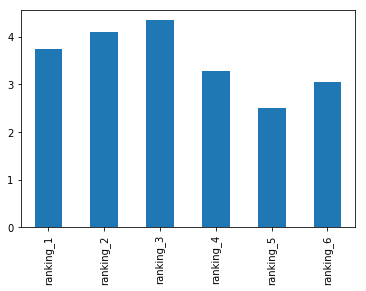

In [13]:
%matplotlib inline
# Use the pandas.DataFrame.mean() method to compute the mean of each of the ranking columns from the last screen.
# Make a bar chart of each ranking. You can use a matplotlib bar chart for this.
# Make sure to run %matplotlib inline beforehand to show your plots in the notebook.
# Write up a summary of what you've done so far in a Markdown cell. Also discuss why you think the respondents ranked the movies the way they did.
# Remember that a lower ranking is better!

import matplotlib.pyplot as plt
ranking_mean = star_wars[star_wars.columns[9:15]].mean()
ranking_mean.plot.bar()
plt.show()


1. <font color=black>It seems that The Empire Strikes Back has the lowest (Best) ranking.</font>
2. <font color=black>It seems that Star Wars: Episode III  Revenge of the Sith has the highest (Ranking) ranking.</font>
3. <font color=black>Also, the original three movies are better ranked then the newer three.</font>